# Libraries

In [ ]:
from move_base_msgs.msg import MoveBaseActionGoal
from sensor_msgs.msg import LaserScan
from actionlib_msgs.msg import GoalID, GoalStatusArray
from std_srvs.srv import Empty
from nav_msgs.msg import Odometry
from geometry_msgs.msg import Twist

from ipywidgets import Button, Layout, ButtonStyle, GridBox, VBox, HBox
from std_msgs.msg import String
import matplotlib.pyplot as plt
import numpy as np
from jupyros import ros3d
import ipywidgets as widgets
import jupyros as jr
import rospy
from matplotlib.animation import FuncAnimation
from tf import transformations

from random import randint
from random import seed

from IPython.display import clear_output

# Define variables/publishers

## Reach the position 

In [ ]:
global id_goal
global unsucc_goal
global succ_goal
global ongoing_goal
global total_goal

ongoing_goal = False

succ_goal = 0
unsucc_goal = 0
total_goal=0

pub_goal = rospy.Publisher("/move_base/goal", MoveBaseActionGoal, queue_size = 1)
pub_cancel = rospy.Publisher("/move_base/cancel", GoalID, queue_size = 1)

## Drive the robot with/without collision avoidance

In [ ]:
global linear_vel
global angular_vel

global lin
global ang

global speed
global wall_th
global avoiding_walls

linear_vel = 0.4
angular_vel = 1.1

lin = 0
ang = 0

speed = Twist()
wall_th = 1
avoiding_walls = False

pub_speed = rospy.Publisher("/cmd_vel", Twist, queue_size = 1)


# Widget declaration

## Select the modality 

In [ ]:
output = widgets.Output()

button1 = Button(description='Reach a precise position',
                 tooltip='Reach a precise position',
                 layout=Layout(width='40%', height='120px', grid_area='b1'),
                 style=ButtonStyle(button_color='moccasin'))

button2 = Button(description='Drive the robot in the environment',
                 tooltip='Drive the robot in the environment',
                 layout=Layout(width='40%', height='120px', grid_area='b2'),
                 style=ButtonStyle(button_color='blue'))

button3 = Button(description='Drive the robot that avoid collisions',
                 tooltip='Drive the robot that avoid collisions',
                 layout=Layout(width='40%', height='120px', grid_area='b3'),
                 style=ButtonStyle(button_color='green'))

modality = HBox([button1, button2, button3])

## Reach the position


In [5]:
cancel_goal_button = Button(description='Cancel the goal',
                            tooltip='Cancel the goal',
                            layout=Layout(width='60%', height='120px', grid_area='b2'),
                            button_style='danger')

send_goal_button = Button(description='Send the goal',
                          tooltip='Send the goal',
                          layout=Layout(width='60%', height='120px', grid_area='b1'),
                          button_style='info')

no_goal_button = Button(description='No',
                        tooltip='Go back to the MENU',
                        layout=Layout(width='60%', height='120px', grid_area='b2'),
                        button_style='danger')

another_goal_button = Button(description='Yes',
                             tooltip='Set another x and y',
                             layout=Layout(width='60%', height='120px', grid_area='b1'),
                             button_style='info')

x = widgets.FloatText(
    value=0,
    description='X:',
    disabled=False
)

y = widgets.FloatText(
    value=0,
    description='Y:',
    disabled=False
)

another_goal_box=HBox([another_goal_button, no_goal_button])
box_for_goal = HBox([x, y])

## Drive the robot with/without collision avoidance

In [6]:
stop_button = Button(description='Stop',
                     tooltip='Stop moving',
                     layout=Layout(width='60%', height='45px', grid_area='b1'),
                     button_style='info')

right_button = Button(description='Right',
                      tooltip='Turn right',
                      layout=Layout(width='60%', height='45px', grid_area='b1'),
                      button_style='info')

left_button = Button(description='Left',
                     tooltip='Turn left',
                     layout=Layout(width='60%', height='45px', grid_area='b1'),
                     button_style='info')



forward_button = Button(description='Forward',
                        tooltip='Go forward',
                        layout=Layout(width='60%', height='45px', grid_area='b1'),
                        button_style='info')

right_forward_button = Button(description='Right-Forward',
                              tooltip='Turn right and go forward',
                              layout=Layout(width='60%', height='45px', grid_area='b1'),
                              button_style='info')

left_forward_button = Button(description='Left-Forward',
                             tooltip='Turn left and go forward',
                             layout=Layout(width='60%', height='45px', grid_area='b1'),
                             button_style='info')



backward_button = Button(description='Backward',
                         tooltip='Go backward',
                         layout=Layout(width='60%', height='45px', grid_area='b1'),
                         button_style='info')

right_backward_button = Button(description='Right-Backward',
                               tooltip='Turn right and go backward',
                               layout=Layout(width='60%', height='45px', grid_area='b1'),
                               button_style='info')

left_backward_button = Button(description='Left-Backward',
                              tooltip='Turn left and go backward',
                              layout=Layout(width='60%', height='45px', grid_area='b1'),
                              button_style='info')



reset_lin_button = Button(description='Reset the linear velocity',
                          tooltip='Reset the linear velocity',
                          layout=Layout(width='60%', height='45px', grid_area='b1'))

increase_lin_button = Button(description='Increase the linear vel',
                               tooltip='Increase the linear velocity by 10%',
                               layout=Layout(width='60%', height='45px', grid_area='b1'),
                               style=ButtonStyle(button_color='green'))

decrease_lin_button = Button(description='Decrease the linear vel',
                               tooltip='Decrease the linear velocity by 10%',
                               layout=Layout(width='60%', height='45px', grid_area='b1'),
                               style=ButtonStyle(button_color='red'))



reset_ang_button = Button(description='Reset the angular velocity',
                          tooltip='Reset the angular velocity',
                          layout=Layout(width='60%', height='45px', grid_area='b1'))

increase_ang_button = Button(description='Increase the angular vel',
                             tooltip='Increase the angular velocity by 10%',
                             layout=Layout(width='60%', height='45px', grid_area='b1'),
                             style=ButtonStyle(button_color='green'))

decrease_ang_button = Button(description='Decrease the angular vel',
                               tooltip='Decrease the angular velocity by 10%',
                               layout=Layout(width='60%', height='45px', grid_area='b1'),
                               style=ButtonStyle(button_color='red'))

                             
                             
reset_both_button = Button(description='Reset both velocity',
                           tooltip='Reset the angular and the linear velocity',
                           layout=Layout(width='60%', height='45px', grid_area='b1'))
                             
increase_both_button = Button(description='Increase both vel',
                              tooltip='Increase the angular and the linear velocity by 10%',
                              layout=Layout(width='60%', height='45px', grid_area='b1'),
                              style=ButtonStyle(button_color='green'))

decrease_both_button = Button(description='Decrease both vel',
                              tooltip='Decrease the angular and the linear velocity by 10%',
                              layout=Layout(width='60%', height='45px', grid_area='b1'),
                              style=ButtonStyle(button_color='red'))

                             

back_to_menu_button = Button(description='Go back to the MENU',
                             tooltip='Go back to the main menu',
                             layout=Layout(width='100%', height='70px', grid_area='b1'),
                             button_style='warning')



row1=HBox([stop_button, right_button, left_button])
row2=HBox([forward_button, right_forward_button, left_forward_button])
row3=HBox([backward_button, right_backward_button, left_backward_button])

row4=HBox([increase_lin_button, reset_lin_button, decrease_lin_button])
row5=HBox([increase_ang_button, reset_ang_button, decrease_ang_button])
row6=HBox([increase_both_button, reset_both_button, decrease_both_button])

actions = VBox([row1,row2,row3,row4,row5,row6, back_to_menu_button])


# Codes

## Functions

### Reach the position 

In [7]:
def first_modality(b):
    clear_output(wait=True)
    display(box_for_goal)
    display(send_goal_button)
    
def sending_x_y(b):
    clear_output(wait=True)
    print("Goal's coordinates: X=", x.value,", Y=", y.value)
    display(cancel_goal_button)
    
    global ongoing_goal
    ongoing_goal = True
    
    global id_goal
    id_goal = randint(1000,10000)
    
    goal = MoveBaseActionGoal()

    goal.goal.target_pose.pose.orientation.w = 1
    
    goal.goal.target_pose.pose.position.x = x.value
    goal.goal.target_pose.pose.position.y = y.value
    
    goal.goal.target_pose.header.frame_id = "map"
    
    goal.goal_id.id=str(id_goal)
    
    pub_goal.publish(goal)
    
    global total_goal
    total_goal += 1
    
def cancelling_goal(b):
    global ongoing_goal
    global id_goal
    
    clear_output(wait=True)
    
    cancel_the_goal = GoalID()
    cancel_the_goal.id=str(id_goal)
    pub_cancel.publish(cancel_the_goal)
    
    print("The goal has been cancelled!")
    
    ongoing_goal = False
    
    print("Set another goal?")
    
    display(another_goal_box)
    

def handler(msg):
    global succ_goal
    global unsucc_goal
    global id_goal
    global ongoing_goal
    
    if ongoing_goal == True:
        status=0
        
        if msg.status_list[0].goal_id.id == str(id_goal):
            status = msg.status_list[0].status

        if status==3:
            clear_output(wait=True)
            
            print("The robot has reached the goal!")
            
            succ_goal+=1
            
            ongoing_goal = False
            
            print("Set another goal?")
            
            display(another_goal_box)
            
        
        if status==4:
            clear_output(wait=True)
            
            print("The robot can't reach the desired position!")
            
            unsucc_goal+=1
            ongoing_goal = False
            
            print("Set another goal?")
            
            display(another_goal_box)
            
            
def back_to_menu_firstmod(b):
    clear_output(wait=True)
    display(modality)

### Drive the robot with/without collision avoidance

In [8]:
def back_to_menu_second_third_mod(b):
    global linear_vel
    global angular_vel

    global lin
    global ang

    global speed
    global wall_th
    global avoiding_walls
    
    avoiding_walls = False
    
    lin = 0
    ang = 0
    
    linear_vel = 0.4
    angular_vel = 1.1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
    clear_output(wait=True)
    display(modality)

def second_modality(b):
    clear_output(wait=True)
    display(actions)
    
def third_modality(b):
    global avoiding_walls
    
    avoiding_walls=True
    clear_output(wait=True)
    display(actions)    
    
def forward(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=1
    ang=0
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def right_forward(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=1
    ang=-1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)

def left_forward(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=1
    ang=1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def stop(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=0
    ang=0
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def right(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=0
    ang=-1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)

def left(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=0
    ang=1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def backward(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=-1
    ang=0
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def right_backward(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=-1
    ang=-1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)

def left_backward(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    lin=-1
    ang=1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def reset_ang(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    angular_vel=1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def increase_ang(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    angular_vel *=1.1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)

def decrease_ang(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    angular_vel *=0.9
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
        
def reset_lin(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    linear_vel=1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def increase_lin(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    linear_vel *=1.1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)

def decrease_lin(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    linear_vel *=0.9
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
        
def reset_both(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    linear_vel=0.4
    angular_vel=1.1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def increase_both(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    linear_vel *=1.1
    angular_vel *=1.1
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)

def decrease_both(b):
    global lin
    global ang
    global linear_vel
    global angular_vel
    global speed
    
    linear_vel *=0.9
    angular_vel *=0.9
    
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)
    
def checking_the_distance(range_of_view, min_value, max_value):
    value = 100
    
    for i in range(min_value, max_value):
        if range_of_view[i] < value:
            value = range_of_view[i]
    return value

def wall_detection(msg):
    
    global ang
    global lin
    global speed
    global wall_th
    global avoiding_walls
    
    if avoiding_walls==True: 
    
        front_wall = checking_the_distance(msg.ranges, 290, 450)
        right_wall = checking_the_distance(msg.ranges, 0, 160)
        left_wall = checking_the_distance(msg.ranges, 559, 719)
    
        if front_wall < wall_th and speed.linear.x > 0:
            lin = 0
            
        if right_wall < wall_th and speed.angular.z < 0:
            ang = 0

        if left_wall < wall_th and speed.angular.z >0:
            ang =0
               
    speed.angular.z = angular_vel*ang
    speed.linear.x=linear_vel*lin
    pub_speed.publish(speed)    

## Association of buttons

### Reach the position

In [9]:
button1.on_click(first_modality)

cancel_goal_button.on_click(cancelling_goal)
send_goal_button.on_click(sending_x_y)

another_goal_button.on_click(first_modality)
no_goal_button.on_click(back_to_menu_firstmod)

### Modality 2 & 3 - Drive the robot (with or without collision avoidance)

In [10]:
button2.on_click(second_modality)
button3.on_click(third_modality)

forward_button.on_click(forward)
right_forward_button.on_click(right_forward)
left_forward_button.on_click(left_forward)

stop_button.on_click(stop)
right_button.on_click(right)
left_button.on_click(left)

backward_button.on_click(backward)
right_backward_button.on_click(right_backward)
left_backward_button.on_click(left_backward)

reset_ang_button.on_click(reset_ang)
increase_ang_button.on_click(increase_ang)
decrease_ang_button.on_click(decrease_ang)

reset_lin_button.on_click(reset_lin)
increase_lin_button.on_click(increase_lin)
decrease_lin_button.on_click(decrease_lin)

reset_both_button.on_click(reset_both)
increase_both_button.on_click(increase_both)
decrease_both_button.on_click(decrease_both)

back_to_menu_button.on_click(back_to_menu_second_third_mod)

# Init Ros and Subscribers

In [11]:
rospy.init_node("RT2_Assignment1")
sub_goal = rospy.Subscriber('/move_base/status', GoalStatusArray, handler)
sub_scan = rospy.Subscriber('/scan', LaserScan, wall_detection)

# Data Visualization

In [12]:
class Visualiser:
    
    def __init__(self):
        self.fig_scan= plt.figure(figsize=(6,6))
        self.ax_scan = plt.subplot(111, polar=True)
        self.ax_scan.set_thetalim(-np.pi/2,np.pi/2)
        self.ax_scan.set_theta_zero_location("N")
        self.laser  = [] 
        self.angles = []
        self.ln_scan, = self.ax_scan.plot([],[],'bo')
        
        self.fig_odom, self.ax_odom = plt.subplots()
        plt.grid(True)
        self.x_pos, self.y_pos = [], []
        self.ln_odom, = plt.plot([] ,[], 'bo')
        
        global succ_goal
        global unsucc_goal
        global total_goal
        
        self.achieved = False

        self.fig_goal, self.ax_goal = plt.subplots()
        plt.grid(True)
        self.status_list = [0, 0]
        self.data = {'Goals reached': succ_goal, 
                     'Goals unreached': unsucc_goal, 
                     'Total goals': total_goal}
        
        self.goal = list(self.data.keys())
        self.values = list(self.data.values())
        self.ln_goal = plt.bar(self.goal, self.values, color=("green", "red", "blue"))
        
    def plot_init(self):
    
        self.ax_scan.set_title("Laser Scan of the robot")
        self.ax_scan.set_ylabel("Distance from wall",fontweight="bold")
        
        self.ax_odom.set_xlim(-20, 20)
        self.ax_odom.set_ylim(-20, 20)
        self.ax_odom.set_title("Position of the robot",fontweight="bold")
        self.ax_odom.set_ylabel("Y",fontweight="bold")
        self.ax_odom.set_xlabel("X",fontweight="bold")

        self.ax_goal.set_ylim(0, 10)
        
        return self.ln_scan , self.ln_odom, self.ln_goal    
        
        
    def laser_scan_callback(self, msg):
        
        self.angles = list(np.arange(msg.angle_min, msg.angle_max+msg.angle_increment, msg.angle_increment))
        self.laser=list(msg.ranges)
        
        
    def odometry_callback(self,msg):
        self.y_pos.append(msg.pose.pose.position.y)
        self.x_pos.append(msg.pose.pose.position.x)
        
    def update_odom_plot(self, frame):
        x = self.x_pos
        y = self.y_pos
        self.ln_odom.set_data(x, y)
        return self.ln_odom
    
    
    def update_goal_plot(self, frame):
        global succ_goal
        global unsucc_goal
        global total_goal
        
        
        x = total_goal
        y = unsucc_goal
        z = succ_goal
        self.updated_data = {'Goals reached': succ_goal, 
                             'Goals unreached': unsucc_goal, 
                             'Total goals': total_goal}
        
        values = list(self.updated_data.values())
        keys = list(self.updated_data.keys())
        
        self.ln_goal = plt.bar(keys, values, color=("green", "red", "blue"))
        
        return self.ln_goal
    
    def update_polar_plot(self, frame):  
        self.ax_scan.set_rmax(20)
        self.ln_scan.set_data(self.angles,self.laser)
        return self.ln_scan


# Command to run the code

In [13]:
display(modality)

Goal's coordinates: X= 0.0 , Y= 0.0


Button(button_style='danger', description='Cancel the goal', layout=Layout(grid_area='b2', height='120px', wid…

# Visualizing the data

<IPython.core.display.Javascript object>


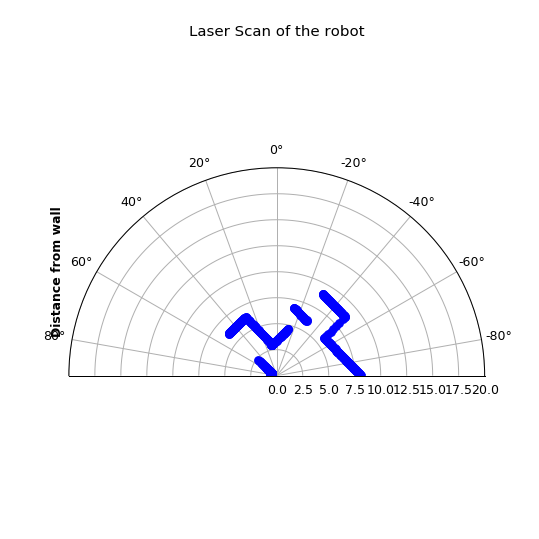

<IPython.core.display.Javascript object>


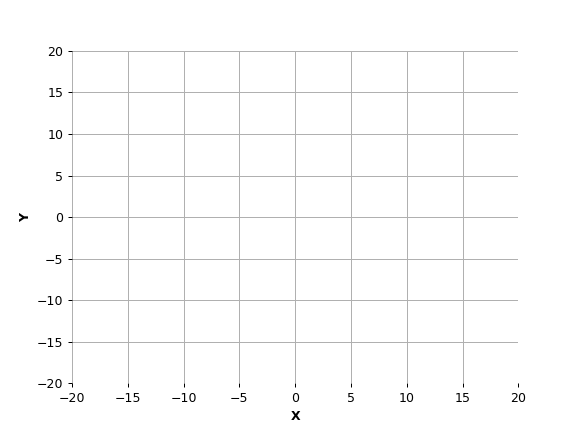

<IPython.core.display.Javascript object>


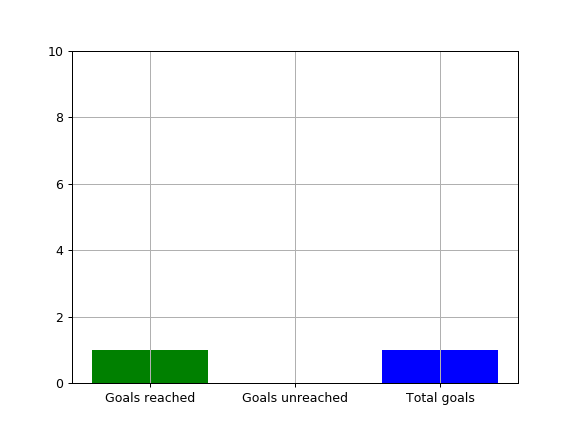

In [14]:
%matplotlib notebook

visualiser = Visualiser()
sub_odom = rospy.Subscriber('/odom', Odometry, visualiser.odometry_callback)
sub_scan2 = rospy.Subscriber('/scan', LaserScan, visualiser.laser_scan_callback)

ani_laser = FuncAnimation(visualiser.fig_scan, visualiser.update_polar_plot, blit = True)
ani_odom = FuncAnimation(visualiser.fig_odom, visualiser.update_odom_plot, init_func=visualiser.plot_init)
ani_target = FuncAnimation(visualiser.fig_goal, visualiser.update_goal_plot, init_func=visualiser.plot_init)

plt.show(block=True)